In [70]:
!python --version

Python 3.7.3


In [71]:
%matplotlib inline


In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import os
import os.path


In [73]:
plt.rcParams['figure.figsize'] = [8,5]

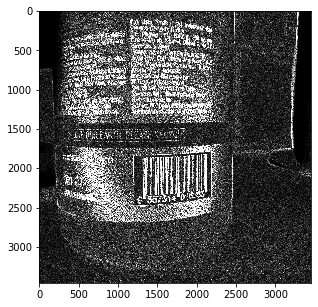

In [74]:
filepath = '01.jpg'
image = cv2.imread(filepath)
     
# convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# compute the Scharr gradient magnitude representation of the images
# in both the x and y direction
gradX = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = -1)
gradY = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = -1)

# subtract the y-gradient from the x-gradient
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)
plt.imshow(gradient, cmap='gray')

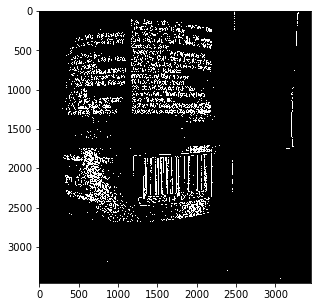

In [75]:
# blur and threshold the image
blurred = cv2.blur(gradient, (4,4))
(_, thresh) = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

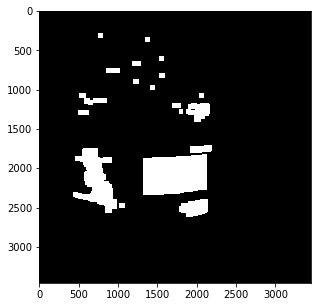

In [76]:
# construct a closing kernel and apply it to the thresholded image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
 # perform a series of erosions and dilations
closed = cv2.erode(closed, None, iterations = 30)
closed = cv2.dilate(closed, None, iterations = 30)
plt.imshow(closed, cmap='gray')

In [77]:
(cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL,
     cv2.CHAIN_APPROX_SIMPLE)

False

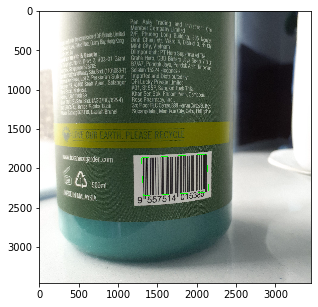

In [78]:
c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
rect = cv2.minAreaRect(c)
box = np.int0(cv2.boxPoints(rect))
cv2.drawContours(image, [box], -1, (0, 255, 0), 3)
plt.imshow(image, cmap='gray')
image_file = 'result/' + os.path.basename(filepath);
cv2.imwrite(image_file, image)
